In [1]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [2]:
import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline_clamped(
    xs: list[float], ys: list[float], d0: float, dn: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - d0, dn: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * d0
    alpha[-1] = 3 * dn - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [3]:
xs = [
    -1,
    1,
]
ys = [
    1,
    3,
]

ss = cubic_spline_clamped(xs=xs, ys=ys, d0=1, dn=2)
_ = [display(s) for s in ss]
print("______")
_ = [display(s.expand()) for s in ss]

0 1 1.0 -0.5 0.25


1.0*x + 0.25*(x + 1)**3 - 0.5*(x + 1)**2 + 2.0

______


0.25*x**3 + 0.25*x**2 + 0.75*x + 1.75

In [4]:
from scipy.interpolate import CubicSpline

xs = [-1, 1]
ys = [1, 3]
s = CubicSpline(xs, ys, bc_type=((1, 1), (2, 2)))
import numpy as np

s([-1, 1])

array([1., 3.])

In [5]:
# Libro
xs = [1, 2, 3]


ys = [2, 3, 5]


splines = cubic_spline(xs=xs, ys=ys)


_ = [display(s) for s in splines]

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

In [6]:
# ejercicio 0
xs = [0, 1, 2]

ys = [-5, -4, 3]


splines = cubic_spline(xs=xs, ys=ys)

_ = [display(s) for s in splines]

print("______")

_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

In [7]:
# ejercicio 0 clamped
xs = [0, 1, 2]

ys = [-5, -4, 3]

d0 = 1
dn = -1
splines = cubic_spline_clamped(xs=xs, ys=ys, d0=2, dn=1)


_ = [display(s) for s in splines]

print("______")

_ = [display(s.expand()) for s in splines]

1 -4 5.249999999999999 9.5 -7.75
0 -5 2.0 -6.25 5.25


5.25*x**3 - 6.25*x**2 + 2.0*x - 5

5.25*x - 7.75*(x - 1)**3 + 9.5*(x - 1)**2 - 9.25

______


5.25*x**3 - 6.25*x**2 + 2.0*x - 5

-7.75*x**3 + 32.75*x**2 - 37.0*x + 8.0

In [8]:
xs = [0, 1, 2]
ys = [1, 5, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
# print("______")
# _ = [display(s.expand()) for s in splines]

1 5 1.0 -4.5 1.5
0 1 5.5 0.0 -1.5


-1.5*x**3 + 5.5*x + 1

1.0*x + 1.5*(x - 1)**3 - 4.5*(x - 1)**2 + 4.0

In [9]:
# xs = [-2, -1, 0, 1, 2]
# ys = [3, 5, 1, -2, 1]

xs = [1, 2, 3, 4]
ys = [
    1,
    5,
    11,
    8,
]

xs = [0, 1, 2, 3]
ys = [
    -1,
    1,
    5,
    2,
]
# 14,11, 8, 5, 2

ss = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in ss]
print("______")
_ = [display(s.expand()) for s in ss]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

In [10]:
xs = [
    1,
    2,
]
ys = [
    1,
    7,
]

ss = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in ss]
print("______")
_ = [display(s.expand()) for s in ss]

0 1 6.0 0 0.0


6.0*x - 5.0

______


6.0*x - 5.0

In [11]:
xs = [-30, -16, -7, 6, 6.1, 20]
ys = [17, 15, 10, 7, 6.9, 12]
cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in cubic_spline(xs=xs, ys=ys)]

4 6.9 -0.9942569162090895 0.14688813572257914 -0.0035224972595342715
3 7 -0.9967973540095628 -0.12148375771784821 0.894572978134761
2 10 -0.2780018346205937 0.06619179468792752 -0.004812193651430146
1 15 -0.5149368452341313 -0.03986568239753447 0.003928054706868962
0 17 0.04318270833135135 0.0 -0.0009491829142270112
4 6.9 -0.9942569162090895 0.14688813572257914 -0.0035224972595342715
3 7 -0.9967973540095628 -0.12148375771784821 0.894572978134761
2 10 -0.2780018346205937 0.06619179468792752 -0.004812193651430146
1 15 -0.5149368452341313 -0.03986568239753447 0.003928054706868962
0 17 0.04318270833135135 0.0 -0.0009491829142270112


0.0431827083313513*x - 0.000949182914227011*(x + 30)**3 + 18.2954812499405

-0.514936845234131*x + 0.00392805470686896*(x + 16)**3 - 0.0398656823975345*(x + 16)**2 + 6.7610104762539

-0.278001834620594*x - 0.00481219365143015*(x + 7)**3 + 0.0661917946879275*(x + 7)**2 + 8.05398715765584

-0.996797354009563*x + 0.894572978134761*(x - 6)**3 - 0.121483757717848*(x - 6)**2 + 12.9807841240574

-0.99425691620909*x - 0.799539950466348*(0.163934426229508*x - 1)**3 + 5.46570753023717*(0.163934426229508*x - 1)**2 + 12.9649671888754

In [12]:
xs = [1, 2, 3, 4]
ys = [1, 5, 11, 8]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]

2 11 2.0666666666666664 -7.6 2.533333333333333
1 5 6.266666666666667 3.4 -3.6666666666666665
0 1 2.8666666666666667 0.0 1.1333333333333333


2.86666666666667*x + 1.13333333333333*(x - 1)**3 - 1.86666666666667

6.26666666666667*x - 3.66666666666667*(x - 2)**3 + 3.4*(x - 2)**2 - 7.53333333333333

2.06666666666667*x + 2.53333333333333*(x - 3)**3 - 7.6*(x - 3)**2 + 4.8

In [13]:
splines[2].subs("x", 3.25)

11.0812500000000

In [14]:
from scipy.interpolate import CubicSpline

xs = [1, 2, 3, 4]
ys = [1, 5, 11, 8]
s = CubicSpline(xs, ys, bc_type="natural")
import numpy as np

s([1.25, 2.25, 3.25])

array([ 1.734375,  6.721875, 11.08125 ])

9 5.9266 0.23566052235057772 0.04190921647413383 -0.013969738824711276
8 5.6968 0.2599881717729784 -0.06623686589653448 0.0360486941235561
7 5.4365 0.1946867905575087 0.13153824711200418 -0.0659250376695129
6 5.2714 0.23746466599698624 -0.1743161225514817 0.10195145655449529
5 5.0019 0.15925454545454543 0.2525262430939225 -0.14228078854846807
4 4.8853 0.28381715218483183 -0.3770888498242089 0.20987169763937716
3 4.4577 0.3380768458061273 0.32282915620291347 -0.2333060020090408
2 4.2674 0.21757546459065794 -0.20232777498744411 0.17505231039678584
1 3.9592 0.28712129583124074 0.1327819437468613 -0.1117032395781018
0 3.7606 0.15433935208437946 0.0 0.044260647915620434


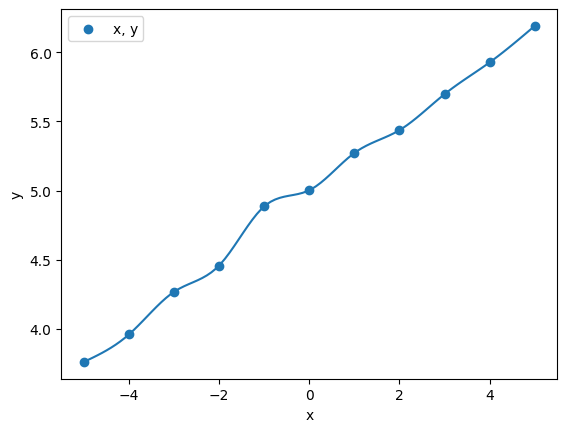

In [23]:
xs = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
ys = [
    3.7606,
    3.9592,
    4.2674,
    4.4577,
    4.8853,
    5.0019,
    5.2714,
    5.4365,
    5.6968,
    5.9266,
    6.1902,
]
splines = cubic_spline(xs=xs, ys=ys)
import matplotlib.pyplot as plt

rango = [-5, 5]
xi = np.linspace(rango[0], rango[1], 100)
yi = []
for x in xi:
    if x < -4:
        j = 0
    elif x < -3:
        j = 1
    elif x < -2:
        j = 2
    elif x < -1:
        j = 3
    elif x < 0:
        j = 4
    elif x < 1:
        j = 5
    elif x < 2:
        j = 6
    elif x < 3:
        j = 7
    elif x < 4:
        j = 8
    else:
        j = 9

    a = splines[j].subs("x", x)
    yi.append(a)
# Plot r
plt.plot(xi, yi)

# Plot x, y
plt.scatter(xs, ys, label="x, y")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(-40, 25)
# plt.ylim(2, 19)
plt.legend()

# Show the plot
plt.show()

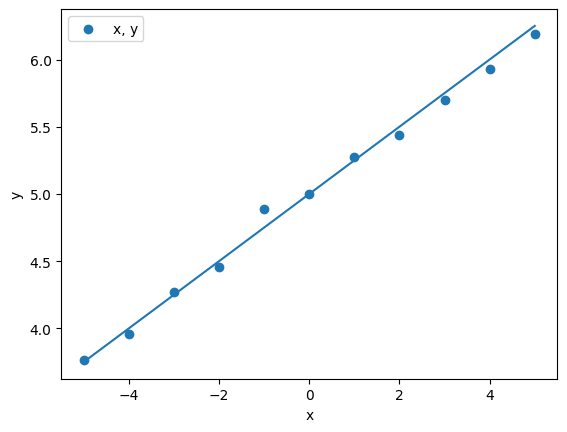

In [26]:
xi = np.linspace(rango[0], rango[1], 100)

# Plot r
plt.plot(xi, 0.25 * xi + 5)

# Plot x, y
plt.scatter(xs, ys, label="x, y")

# Add labels and legend
plt.xlabel("x")
plt.ylabel("y")
# plt.xlim(-40, 25)
# plt.ylim(2, 19)
plt.legend()

# Show the plot
plt.show()